# Food Nutrition K-Means Clustering Analysis

## Install Packages

In [3]:
import pandas as pd
import seaborn as sns
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import plotly.express as px

## Data Description

The dataset, ‘nutrients_csvfile.csv’, was aqquired from kaggle.com. There were originally 335 data points in total with 10 variables. Below figure shows the first 10 rows of the dataset at its original form. 

In [4]:
df = pd.read_csv('nutrients_csvfile.csv')
df.head(10)
#t = teaspoon, T = Tablespoon

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
5,Powdered milk,1 cup,103,515,27,28,24,0,39,Dairy products
6,"skim, instant",1 1/3 cups,85,290,30,t,t,0,42,Dairy products
7,"skim, non-instant",2/3 cup,85,290,30,t,t,1,42,Dairy products
8,Goats' milk,1 cup,244,165,8,10,8,0,11,Dairy products
9,(1/2 cup ice cream),2 cups,540,690,24,24,22,0,70,Dairy products


Each row of the dataset are independent food products labeled with several nutritional metrics, weight metrics, and its food category. Here are the detailed description of each columns. 


| Column Name  | Description|
|:-------------|:-----------|
| Food | Name of food products.  | 
| Measure | Amount of corresponding food product in kitchen metrics. | 
| Grams | Amount of corresponding food product in grams.  | 
| Calories | Calories associated with stated Grams metrics. | 
| Protein | Grams of protein associated with stated Grams value. | 
| Fat | Grams of fat associated with stated Grams value. | 
| Sat.Fat | Grams of saturated fat associated with stated Grams value. | 
| Fiber | Grams of fiber associated with stated Grams value. | 
| Carbs | Grams of carbon hydrates associated with stated Grams value. | 
| Category | Overall food category of associated food product.  | 

## Data Cleaning

In [5]:
print(df.shape[0])
print(df.shape[1])

335
10


***Null Values***

A quick diagnoses of null variables 

In [6]:
df.isnull().sum()

Food        0
Measure     0
Grams       0
Calories    1
Protein     0
Fat         0
Sat.Fat     2
Fiber       0
Carbs       0
Category    0
dtype: int64

After checking for null values, there were 3 total null values in the dataset (Calories: 1, Sat.Fat: 2). Since there weren’t too many null variables, the rows with null variables were deleted from the datasets

In [7]:
#Get rid of rows with NaN values
df = df.dropna()
df = df.reset_index() #Reset the dataframe indexing. 
df.shape[0] #3 rows dropped

332

After the operation, total of 332 rows remained in the dataset. 

***Measure Column***

In terms of this analysis, Measure columns was identified unuseful, since Grams column can be used instead for the same purpose. Measure column was therefore dropped from the dataset. 

In [8]:
#First, we don't need measure. Drop the column.
df = df.drop('Measure', axis = 'columns')

In [9]:
pd.set_option('display.max_rows', None )
df['Calories'].head()

0      660
1      360
2      127
3      345
4    1,373
Name: Calories, dtype: object

***Grams Column / Calories Column***

Since these columns, all the semicolons used to indicate the thousands placement was dropped. Then, it was converted to float data-type from string data-type. 

In [10]:
#For gram, calories column, strip the colon so we can turn into float
df['Grams'] = df['Grams'].str.replace(',','')
df['Grams'] = df['Grams'].astype(float)
df['Calories'] = df['Calories'].str.replace(',','')
df['Calories'] = df['Calories'].str.replace('-','')
df['Calories'] = df['Calories'].astype(float)

***Protein Column / Fat Column / Sat.Fat Column / Fiber Column / Carbs Column***

Before Dealing with "t" and "T" in these columns. Similar operation to previous step was taken in here. Take out non-numerical substrings. 

In [11]:
df['Carbs'] = df['Carbs'].str.replace("'",'')
df['Fiber'] = df['Fiber'].str.replace("'",'')
df['Fiber'] = df['Fiber'].str.replace('a','')
df['Sat.Fat'] = df['Sat.Fat'].str.replace("'",'')
df['Fat'] = df['Fat'].str.replace("'",'')
df['Protein'] = df['Protein'].str.replace("'",'')

In [12]:
df = df.loc[df['Fiber'] != '',]
print(df.info())
print(df.shape[0])
df = df.reset_index()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 331
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     331 non-null    int64  
 1   Food      331 non-null    object 
 2   Grams     331 non-null    float64
 3   Calories  331 non-null    float64
 4   Protein   331 non-null    object 
 5   Fat       331 non-null    object 
 6   Sat.Fat   331 non-null    object 
 7   Fiber     331 non-null    object 
 8   Carbs     331 non-null    object 
 9   Category  331 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 28.4+ KB
None
331


In [13]:
df.head()

,level_0,index,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,0,0,Cows' milk,976.0,660.0,32,40,36,0,48,Dairy products
1,1,1,Milk skim,984.0,360.0,36,t,t,0,52,Dairy products
2,2,2,Buttermilk,246.0,127.0,9,5,4,0,13,Dairy products
3,3,3,"Evaporated, undiluted",252.0,345.0,16,20,18,0,24,Dairy products
4,4,4,Fortified milk,1419.0,1373.0,89,42,23,1.4,119,Dairy products


In [14]:
df.shape[0]

331

The focus for these column was to convert “t” values “T” values into grams. More specifically, “t” indicates teaspoon amount which is 4.2 grams. Similarly, “T” indicates table spoon amount which is 14.175 grams. First, “t” and “T” were replaced with corresponding gram measures. 

In [15]:
#Make protein, fat, sat.fat, fiber, carbs float. Concert "t" "T" into grams. 1 teaspoon = 4.2 grams, 1 Tablespoon = 14.175 grams. 
for i in range(df.shape[0]):
    if df['Protein'][i] == 't':
        df['Protein'][i] = '4.2'
    elif df['Protein'][i] == 'T':
        df['Protein'][i] = '14.175'
for i in range(df.shape[0]):
    if df['Fat'][i] == 't':
        df['Fat'][i] = '4.2'
    elif df['Fat'][i] == 'T':
        df['Fat'][i] = '14.175'
for i in range(df.shape[0]):
    if df['Sat.Fat'][i] == 't':
        df['Sat.Fat'][i] = '4.2'
    elif df['Sat.Fat'][i] == 'T':
        df['Sat.Fat'][i] = '14.175'
for i in range(df.shape[0]):
    if df['Fiber'][i] == 't':
        df['Fiber'][i] = '4.2'
    elif df['Fiber'][i] == 'T':
        df['Fiber'][i] = '14.175'
for i in range(df.shape[0]):
    if df['Carbs'][i] == 't':
        df['Carbs'][i] = '4.2'
    elif df['Carbs'][i] == 'T':
        df['Carbs'][i] = '14.175'

<ipython-input-15-f6c8d7158937>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Protein'][i] = '4.2'
<ipython-input-15-f6c8d7158937>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fat'][i] = '4.2'
<ipython-input-15-f6c8d7158937>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sat.Fat'][i] = '4.2'
<ipython-input-15-f6c8d7158937>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

Finally, they were converted in to float data-types from string data-types. 

In [16]:
df['Protein'] = df['Protein'].astype(float)
df['Fat'] = df['Fat'].astype(float)
df['Sat.Fat'] = df['Sat.Fat'].astype(float)
df['Fiber'] = df['Fiber'].astype(float)
df['Carbs'] = df['Carbs'].astype(float)

In [17]:
#Look at the results
df.head()

,level_0,index,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,0,0,Cows' milk,976.0,660.0,32.0,40.0,36.0,0.0,48.0,Dairy products
1,1,1,Milk skim,984.0,360.0,36.0,4.2,4.2,0.0,52.0,Dairy products
2,2,2,Buttermilk,246.0,127.0,9.0,5.0,4.0,0.0,13.0,Dairy products
3,3,3,"Evaporated, undiluted",252.0,345.0,16.0,20.0,18.0,0.0,24.0,Dairy products
4,4,4,Fortified milk,1419.0,1373.0,89.0,42.0,23.0,1.4,119.0,Dairy products


***Creating Derived Columns***

The metrics used in the original dataset are measured in different grams. This is inconsistent and will have a negative effect on this analysis when clustered. To solve this problem, each metrics are devided by overall grams of corresponding food product in order to create x per gram metrics. For example, the first row will have 32.0g (protein) / 976.0g (overall) = 0.032787g (protein)/1g (overall)

In [18]:
#Now, since all the grams are not scaled, we need to make every measure per gram. 
#First create empty columns for each measure
df['Cal/Gram'] = np.nan
df['Prot/Gram'] = np.nan
df['Fat/Gram'] = np.nan
df['SatFat/Gram'] = np.nan
df['Fib/Gram'] = np.nan
df['Carb/Gram'] = np.nan
df.head(10)

,level_0,index,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,Cal/Gram,Prot/Gram,Fat/Gram,SatFat/Gram,Fib/Gram,Carb/Gram
0,0,0,Cows' milk,976.0,660.0,32.0,40.0,36.0,0.0,48.0,Dairy products,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Milk skim,984.0,360.0,36.0,4.2,4.2,0.0,52.0,Dairy products,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,Buttermilk,246.0,127.0,9.0,5.0,4.0,0.0,13.0,Dairy products,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,"Evaporated, undiluted",252.0,345.0,16.0,20.0,18.0,0.0,24.0,Dairy products,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,Fortified milk,1419.0,1373.0,89.0,42.0,23.0,1.4,119.0,Dairy products,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,Powdered milk,103.0,515.0,27.0,28.0,24.0,0.0,39.0,Dairy products,NaN,NaN,NaN,NaN,NaN,NaN
6,6,6,"skim, instant",85.0,290.0,30.0,4.2,4.2,0.0,42.0,Dairy products,NaN,NaN,NaN,NaN,NaN,NaN
7,7,7,"skim, non-instant",85.0,290.0,30.0,4.2,4.2,1.0,42.0,Dairy products,NaN,NaN,NaN,NaN,NaN,NaN
8,8,8,Goats' milk,244.0,165.0,8.0,10.0,8.0,0.0,11.0,Dairy products,NaN,NaN,NaN,NaN,NaN,NaN
9,9,9,(1/2 cup ice cream),540.0,690.0,24.0,24.0,22.0,0.0,70.0,Dairy products,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Now calculate all the measures
df['Cal/Gram'] = df['Calories']/df['Grams']
df['Prot/Gram'] = df['Protein']/df['Grams']
df['Fat/Gram'] = df['Fat']/df['Grams']
df['SatFat/Gram'] = df['Sat.Fat']/df['Grams']
df['Fib/Gram'] = df['Fiber']/df['Grams']
df['Carb/Gram'] = df['Carbs']/df['Grams']
df.head(10)

,level_0,index,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,Cal/Gram,Prot/Gram,Fat/Gram,SatFat/Gram,Fib/Gram,Carb/Gram
0,0,0,Cows' milk,976.0,660.0,32.0,40.0,36.0,0.0,48.0,Dairy products,0.676230,0.032787,0.040984,0.036885,0.000000,0.049180
1,1,1,Milk skim,984.0,360.0,36.0,4.2,4.2,0.0,52.0,Dairy products,0.365854,0.036585,0.004268,0.004268,0.000000,0.052846
2,2,2,Buttermilk,246.0,127.0,9.0,5.0,4.0,0.0,13.0,Dairy products,0.516260,0.036585,0.020325,0.016260,0.000000,0.052846
3,3,3,"Evaporated, undiluted",252.0,345.0,16.0,20.0,18.0,0.0,24.0,Dairy products,1.369048,0.063492,0.079365,0.071429,0.000000,0.095238
4,4,4,Fortified milk,1419.0,1373.0,89.0,42.0,23.0,1.4,119.0,Dairy products,0.967583,0.062720,0.029598,0.016209,0.000987,0.083862
5,5,5,Powdered milk,103.0,515.0,27.0,28.0,24.0,0.0,39.0,Dairy products,5.000000,0.262136,0.271845,0.233010,0.000000,0.378641
6,6,6,"skim, instant",85.0,290.0,30.0,4.2,4.2,0.0,42.0,Dairy products,3.411765,0.352941,0.049412,0.049412,0.000000,0.494118
7,7,7,"skim, non-instant",85.0,290.0,30.0,4.2,4.2,1.0,42.0,Dairy products,3.411765,0.352941,0.049412,0.049412,0.011765,0.494118
8,8,8,Goats' milk,244.0,165.0,8.0,10.0,8.0,0.0,11.0,Dairy products,0.676230,0.032787,0.040984,0.032787,0.000000,0.045082
9,9,9,(1/2 cup ice cream),540.0,690.0,24.0,24.0,22.0,0.0,70.0,Dairy products,1.277778,0.044444,0.044444,0.040741,0.000000,0.129630


After deleting all the original columns, here are the resulting dataset. 

In [20]:
#Now delete the uncalculated columns
df = df.drop('Grams', axis = 'columns')
df = df.drop('Calories', axis = 'columns')
df = df.drop('Protein', axis = 'columns')
df = df.drop('Fat', axis = 'columns')
df = df.drop('Sat.Fat', axis = 'columns')
df = df.drop('Fiber', axis = 'columns')
df = df.drop('Carbs', axis = 'columns')
df.head(10)

,level_0,index,Food,Category,Cal/Gram,Prot/Gram,Fat/Gram,SatFat/Gram,Fib/Gram,Carb/Gram
0,0,0,Cows' milk,Dairy products,0.676230,0.032787,0.040984,0.036885,0.000000,0.049180
1,1,1,Milk skim,Dairy products,0.365854,0.036585,0.004268,0.004268,0.000000,0.052846
2,2,2,Buttermilk,Dairy products,0.516260,0.036585,0.020325,0.016260,0.000000,0.052846
3,3,3,"Evaporated, undiluted",Dairy products,1.369048,0.063492,0.079365,0.071429,0.000000,0.095238
4,4,4,Fortified milk,Dairy products,0.967583,0.062720,0.029598,0.016209,0.000987,0.083862
5,5,5,Powdered milk,Dairy products,5.000000,0.262136,0.271845,0.233010,0.000000,0.378641
6,6,6,"skim, instant",Dairy products,3.411765,0.352941,0.049412,0.049412,0.000000,0.494118
7,7,7,"skim, non-instant",Dairy products,3.411765,0.352941,0.049412,0.049412,0.011765,0.494118
8,8,8,Goats' milk,Dairy products,0.676230,0.032787,0.040984,0.032787,0.000000,0.045082
9,9,9,(1/2 cup ice cream),Dairy products,1.277778,0.044444,0.044444,0.040741,0.000000,0.129630


## EDA / Visualization (2D)

In terms of diet, generally, most important nutrition to take into account are Protein, Fat, and Carbs. Pairs of scatter plots were produced in order to diagnose the existence of outliers. 

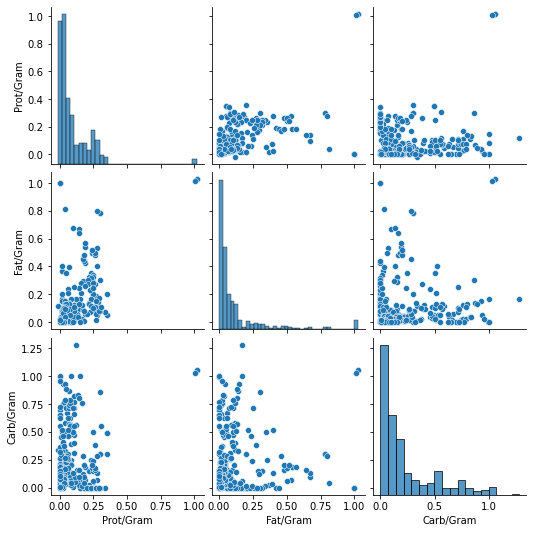

In [21]:
sns.pairplot(df[['Prot/Gram', 'Fat/Gram', 'Carb/Gram']])

Usually, the carbon hydrate and fat content most effect the calories in food. At the same time, Protein:Calorie ratio is very important in a diet. Below scatterplot was produced to visualize the calorie and protein content. In the scatter plot, we recognize some outliers on protein axis. 

AxesSubplot(0.125,0.125;0.775x0.755)


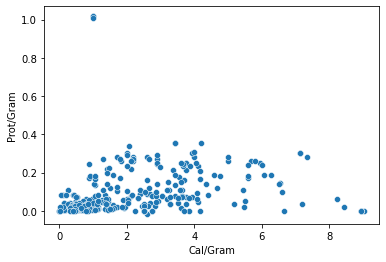

In [22]:
print(sns.scatterplot(x = 'Cal/Gram', y = 'Prot/Gram', data = df))
#There is an oulier, it is better to drop the outlier for the sake of the analysis. 

It is important to drop these outliers, in order to get meaningful results from applying k-means clustering. Since all the outliers seems to be above 0.6g (protein), dropping those values will be appropriate. After the operation, 3 rows were dropped, leaving total of 328 datapoints.

In [23]:
print(df[df['Prot/Gram'] > 0.6]) #Drop these three rows. 
df.head(10)

    level_0  index     Food                 Category  Cal/Gram  Prot/Gram  \
30       30     30   Butter  Fats, Oils, Shortenings  1.008929   1.017857   
31       31     31   Butter  Fats, Oils, Shortenings  1.008929   1.017857   
80       81     82  Oysters            Fish, Seafood  1.004348   1.008696   

    Fat/Gram  SatFat/Gram  Fib/Gram  Carb/Gram  
30  1.026786     1.035714  1.044643   1.053571  
31  1.026786     1.035714  1.044643   1.053571  
80  1.013043     1.017391  1.021739   1.026087  


,level_0,index,Food,Category,Cal/Gram,Prot/Gram,Fat/Gram,SatFat/Gram,Fib/Gram,Carb/Gram
0,0,0,Cows' milk,Dairy products,0.676230,0.032787,0.040984,0.036885,0.000000,0.049180
1,1,1,Milk skim,Dairy products,0.365854,0.036585,0.004268,0.004268,0.000000,0.052846
2,2,2,Buttermilk,Dairy products,0.516260,0.036585,0.020325,0.016260,0.000000,0.052846
3,3,3,"Evaporated, undiluted",Dairy products,1.369048,0.063492,0.079365,0.071429,0.000000,0.095238
4,4,4,Fortified milk,Dairy products,0.967583,0.062720,0.029598,0.016209,0.000987,0.083862
5,5,5,Powdered milk,Dairy products,5.000000,0.262136,0.271845,0.233010,0.000000,0.378641
6,6,6,"skim, instant",Dairy products,3.411765,0.352941,0.049412,0.049412,0.000000,0.494118
7,7,7,"skim, non-instant",Dairy products,3.411765,0.352941,0.049412,0.049412,0.011765,0.494118
8,8,8,Goats' milk,Dairy products,0.676230,0.032787,0.040984,0.032787,0.000000,0.045082
9,9,9,(1/2 cup ice cream),Dairy products,1.277778,0.044444,0.044444,0.040741,0.000000,0.129630


In [24]:
indexes = df[df['Prot/Gram'] > 0.6].index
df = df.drop(indexes)#Reset the dataframe indexing. 
df.shape[0]

328

After dropping the outliers, another scatterplot was produced. Now it looks well distributed, and is ready for k-means algorythm to be applied. 

<AxesSubplot:xlabel='Cal/Gram', ylabel='Prot/Gram'>

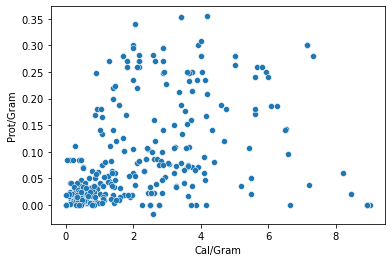

In [25]:
sns.scatterplot(x = 'Cal/Gram', y = 'Prot/Gram', data = df)

Since k-means clustering involves measuring the distance between each data points, it is extremely important to scale x(Calorie/gram) and y(Protein/gram) data before applying the algorythm. From above scatterplot, it is appearent that x and yvariable is not scaled. x variable has maximum of >8, and y variable has maximum of <0.4. For this reason, MinMaxScaler method from sklearn.preprocessing package was used. With this method, each both x and y variable were set to have minimum value of 0 and maximum value of 1, and scale each data point accordingly. 

In [26]:
#We need to standerdize the scaling of the data. 
scaler = MinMaxScaler()
scaler.fit(df[['Cal/Gram']])
df[['Cal/Gram']] = scaler.transform(df[['Cal/Gram']])

scaler.fit(df[['Prot/Gram']])
df[['Prot/Gram']] = scaler.transform(df[['Prot/Gram']])

train_data1 = df[['index','Category','Cal/Gram','Prot/Gram']]
train_data1.head(10)

,index,Category,Cal/Gram,Prot/Gram
0,0,Dairy products,0.074985,0.133222
1,1,Dairy products,0.040568,0.143454
2,2,Dairy products,0.057247,0.143454
3,3,Dairy products,0.151810,0.215938
4,4,Dairy products,0.107292,0.213859
5,5,Dairy products,0.554435,0.751060
6,6,Dairy products,0.378321,0.995678
7,7,Dairy products,0.378321,0.995678
8,8,Dairy products,0.074985,0.133222
9,9,Dairy products,0.141689,0.164626


Another scatterplot shows that all the variables were scaled property.

<AxesSubplot:xlabel='Cal/Gram', ylabel='Prot/Gram'>

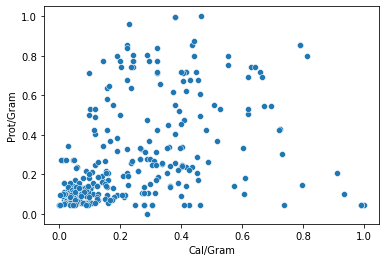

In [27]:
sns.scatterplot(x = 'Cal/Gram', y = 'Prot/Gram', data = train_data1)

## Applying k-means (2D)

***Elbow Method***

In order to identify the optimal number of clusters to be used in the analysis, elbow method was utilized. below code shows that for loop was used calculate and create a list of Within-Cluster-Sum-of-Squares. Line plot was also produced to identify the 'elbow'. From the line plot, it is appropriate to choose 3 for the elbow for this analysis. 

In [28]:
#To choose the riht number of k, perform an elbow method. 
wcss = []
for k in range(1, 7): 
    kmeans = cluster.KMeans(k)
    kmeans.fit(train_data1[['Cal/Gram','Prot/Gram']])
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[35.07706860865951,
 15.554536021584989,
 9.463051892880006,
 6.812396292581211,
 5.266057018777814,
 4.214643882792035]

Text(0, 0.5, 'WCSS')

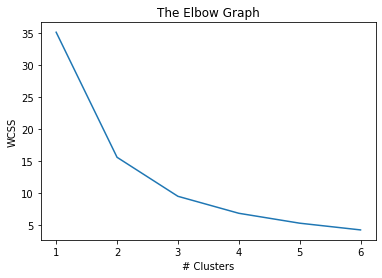

In [29]:
plt.plot(range(1,7), wcss)
plt.title('The Elbow Graph')
plt.xlabel('# Clusters')
plt.ylabel('WCSS')
#We'll use 3 clusters

***Clustering***

Using the value of clusters was aqquired in the previous step, the clusters can be allocated for each data point. For this step, KMeans() method from sklearn.cluster was used to identify each cluster allocation. 3 centroids were also identified as shown below.

In [30]:
#Create a model. 
km3 = cluster.KMeans(n_clusters = 3)
y_pred3 = km3.fit_predict(train_data1[['Cal/Gram','Prot/Gram']])
centroid = km3.cluster_centers_
print('Labels:')
print(y_pred3)
print()
print('Centroids:')
print(centroid)

Labels:
[1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 0 1 2 2 2 0 2 2 2 1 1 2 2 0 0 0 2 2 0 0
 0 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 2 0 0 1 1 0 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 1 1 1 0 0 2 2 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 2 2 0 0 0 2 2 2 0 2 2 0 1 1 1 1 1 1 1 1 1 1 1 1]

Centroids:
[[0.4692001  0.23795959]
 [0.09547822 0.12312147]
 [0.37466725 0.70142318]]


In [31]:
train_data1['Cluster'] = y_pred3
train_data1.head(10)

<ipython-input-31-a8422dbc7f9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Cluster'] = y_pred3


,index,Category,Cal/Gram,Prot/Gram,Cluster
0,0,Dairy products,0.074985,0.133222,1
1,1,Dairy products,0.040568,0.143454,1
2,2,Dairy products,0.057247,0.143454,1
3,3,Dairy products,0.151810,0.215938,1
4,4,Dairy products,0.107292,0.213859,1
5,5,Dairy products,0.554435,0.751060,2
6,6,Dairy products,0.378321,0.995678,2
7,7,Dairy products,0.378321,0.995678,2
8,8,Dairy products,0.074985,0.133222,1
9,9,Dairy products,0.141689,0.164626,1


A scatterplot was also produced in order to visualize data points as they were labeled by each clusters. Centroids are also drawn on the scatterplot with "+" mark. 

In [32]:
c0_top3 = pd.DataFrame(train_data1.loc[train_data1['Cluster'] == 0, 'Category'].value_counts().head(3))
c0_top3 =  c0_top3.rename(columns = {'Category': 'Number of Products'}, inplace = False)
c1_top3 = pd.DataFrame(train_data1.loc[train_data1['Cluster'] == 1, 'Category'].value_counts().head(3))
c1_top3 =  c1_top3.rename(columns = {'Category': 'Number of Products'}, inplace = False)
c2_top3 = pd.DataFrame(train_data1.loc[train_data1['Cluster'] == 2, 'Category'].value_counts().head(3))
c2_top3 =  c2_top3.rename(columns = {'Category': 'Number of Products'}, inplace = False)
print('Cluster 0:')
print(c0_top3)
print()
print('Cluster 1:')
print(c1_top3)
print()
print('Cluster 2:')
print(c2_top3)

Cluster 0:
                                  Number of Products
Breads, cereals, fastfood,grains                  28
Desserts, sweets                                  15
Fats, Oils, Shortenings                            6

Cluster 1:
                Number of Products
Fruits G-P                      28
Vegetables A-E                  26
Vegetables R-Z                  24

Cluster 2:
                Number of Products
Meat, Poultry                   24
Fish, Seafood                   16
Dairy products                   9


C:\Users\taku0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cal/Gram', ylabel='Prot/Gram'>

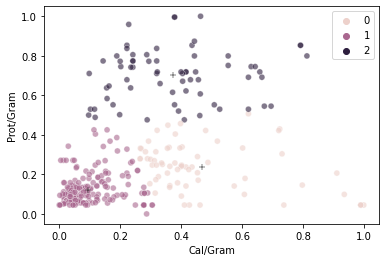

In [33]:
sns.scatterplot(x = 'Cal/Gram', y = 'Prot/Gram', hue = 'Cluster', data = train_data1, alpha = 0.6)
sns.scatterplot(centroid[:, 0], centroid[:, 1], color = 'black', marker = '+')

## EDA / Visualization (3D)

In order to get a more detailed clustering of the food nutritional data, 3-dimensional clustering could be implemented as well. For this analysis, it is appropriate to drop calories from the focus of analysis, but include 3 variable that people are most concerned with in dieting needs: Protein, Fat, and Carbon Hydrates. Training dataset that only includes these values are created.

In [34]:
#I want to try 3 variables 
df.head(10)

,level_0,index,Food,Category,Cal/Gram,Prot/Gram,Fat/Gram,SatFat/Gram,Fib/Gram,Carb/Gram
0,0,0,Cows' milk,Dairy products,0.074985,0.133222,0.040984,0.036885,0.000000,0.049180
1,1,1,Milk skim,Dairy products,0.040568,0.143454,0.004268,0.004268,0.000000,0.052846
2,2,2,Buttermilk,Dairy products,0.057247,0.143454,0.020325,0.016260,0.000000,0.052846
3,3,3,"Evaporated, undiluted",Dairy products,0.151810,0.215938,0.079365,0.071429,0.000000,0.095238
4,4,4,Fortified milk,Dairy products,0.107292,0.213859,0.029598,0.016209,0.000987,0.083862
5,5,5,Powdered milk,Dairy products,0.554435,0.751060,0.271845,0.233010,0.000000,0.378641
6,6,6,"skim, instant",Dairy products,0.378321,0.995678,0.049412,0.049412,0.000000,0.494118
7,7,7,"skim, non-instant",Dairy products,0.378321,0.995678,0.049412,0.049412,0.011765,0.494118
8,8,8,Goats' milk,Dairy products,0.074985,0.133222,0.040984,0.032787,0.000000,0.045082
9,9,9,(1/2 cup ice cream),Dairy products,0.141689,0.164626,0.044444,0.040741,0.000000,0.129630


In [35]:
#Take out calories but take Protein, Fat, and Carbs into consideration. 
train_data2 = df[['index','Food','Category','Prot/Gram', 'Fat/Gram', 'Carb/Gram']]
train_data2.head(10)

,index,Food,Category,Prot/Gram,Fat/Gram,Carb/Gram
0,0,Cows' milk,Dairy products,0.133222,0.040984,0.049180
1,1,Milk skim,Dairy products,0.143454,0.004268,0.052846
2,2,Buttermilk,Dairy products,0.143454,0.020325,0.052846
3,3,"Evaporated, undiluted",Dairy products,0.215938,0.079365,0.095238
4,4,Fortified milk,Dairy products,0.213859,0.029598,0.083862
5,5,Powdered milk,Dairy products,0.751060,0.271845,0.378641
6,6,"skim, instant",Dairy products,0.995678,0.049412,0.494118
7,7,"skim, non-instant",Dairy products,0.995678,0.049412,0.494118
8,8,Goats' milk,Dairy products,0.133222,0.040984,0.045082
9,9,(1/2 cup ice cream),Dairy products,0.164626,0.044444,0.129630


In order to visulize 3D data, plotly exprepress package is used here. in the following scatterplot, x value is protein/gram, y value is fat/gram, and z value is set carbs/gram. 

In [36]:
%matplotlib inline

In [37]:
#set x, y, z cordinates for the scatter plot
x = train_data2['Prot/Gram']
y = train_data2['Fat/Gram']
z = train_data2['Carb/Gram']

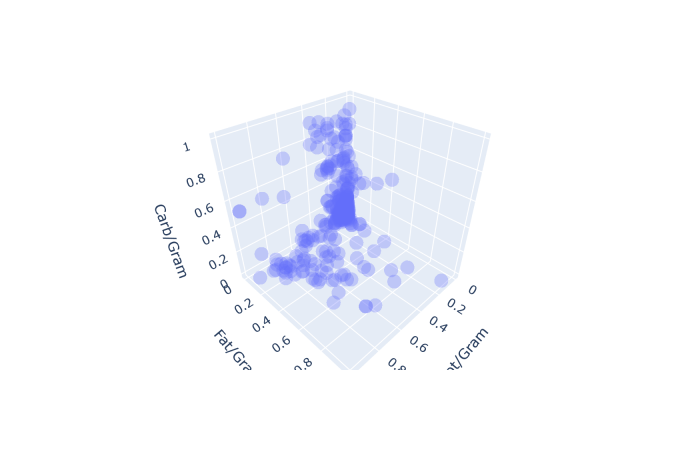

In [53]:
scatter = px.scatter_3d(train_data2, x = 'Prot/Gram', y = 'Fat/Gram', z = 'Carb/Gram', opacity = 0.3)
scatter.show("svg")

From the plot, it is appearent that there are numbers of outliers within the dataset. Here are the measurements that will be cutting off: "Carbs/Gram" > 0.9, "Fat/Gram" > 0.9. "Protein/Gram" does not seem to have an appearent outlier, so it will be left as it is. 

In [39]:
#create an empty list
indexes = []
#Add the indexces that matches certain conditions to the empty list.
indexes.extend(train_data2[train_data2['Carb/Gram'] > 0.9].index)
indexes.extend(train_data2[train_data2['Fat/Gram'] > 0.9].index)
indexes
#Drop the rows with those indexes.
train_data2 = train_data2.drop(indexes)

Similar to the steps in 2D, before applying the k-means algorythm, 3 variables has to be scaled in order to have a proper k-means analysis. Here, all the variables are scaled from 0 to 1 using the MinMaxScaler() method.

In [40]:
#Apply the MinMax method to the dataframe again to adjust for the changes. 
scaler = MinMaxScaler()
scaler.fit(train_data2[['Fat/Gram']])
train_data2[['Fat/Gram']] = scaler.transform(train_data2[['Fat/Gram']])

scaler.fit(train_data2[['Carb/Gram']])
train_data2[['Carb/Gram']] = scaler.transform(train_data2[['Carb/Gram']])

scaler.fit(train_data2[['Prot/Gram']])
train_data2[['Prot/Gram']] = scaler.transform(train_data2[['Prot/Gram']])

train_data2.describe() #Scaled correctly.

,index,Prot/Gram,Fat/Gram,Carb/Gram
count,315.000000,315.000000,315.000000,315.000000
mean,168.755556,0.271758,0.125859,0.231822
std,95.870836,0.250913,0.185635,0.252382
min,0.000000,0.000000,0.000000,0.000000
25%,88.500000,0.086342,0.021538,0.051320
50%,169.000000,0.158041,0.051692,0.138158
75%,251.500000,0.377143,0.134288,0.315000
max,334.000000,1.000000,1.000000,1.000000


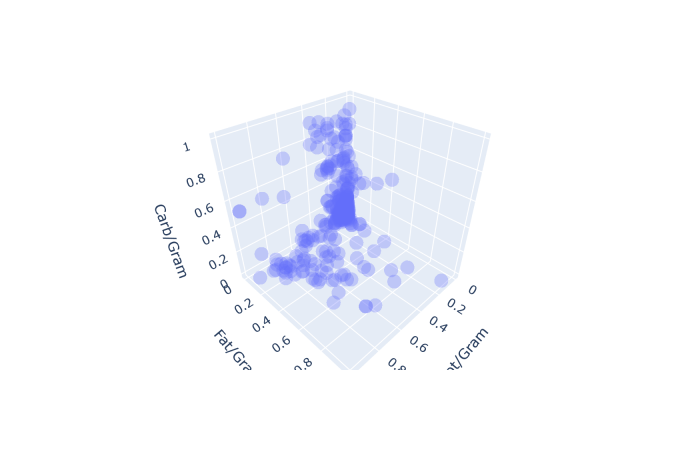

In [52]:
scatter = px.scatter_3d(train_data2, x = 'Prot/Gram', y = 'Fat/Gram', z = 'Carb/Gram', opacity = 0.3)
scatter.show("svg")

## Applying k-means (3D)

***Elbow Method***

In order to identify the optimal number of clusters to be used in the analysis, elbow method was utilized. below code shows that for loop was used calculate and create a list of Within-Cluster-Sum-of-Squares. Line plot was also produced to identify the 'elbow'. From the line plot, it is appropriate to choose 4 for the elbow for this analysis. 

In [42]:
#Now we try to apply the k-means algorythm. but before that, we try to find the best number of cluster with elbow method. 
wcss = []
for k in range(1, 7): 
    kmeans = cluster.KMeans(k)
    kmeans.fit(train_data2[['Fat/Gram','Prot/Gram', 'Carb/Gram']])
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[50.58996527239679,
 29.423477177770646,
 15.432389855788202,
 11.378883992777311,
 9.518482696616394,
 8.241775556001267]

Text(0, 0.5, 'WCSS')

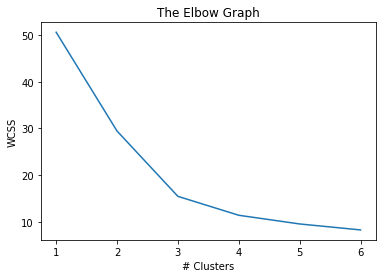

In [43]:
plt.plot(range(1,7), wcss)
plt.title('The Elbow Graph')
plt.xlabel('# Clusters')
plt.ylabel('WCSS')
#4 clusters looks more promising for this one.

***Clustering***

Using the value of clusters was aqquired in the previous step, the clusters can be allocated for each data point. For this step, KMeans() method from sklearn.cluster was used to identify each cluster allocation. 3 centroids were also identified as shown below.

In [44]:
#Apply k-means algorythm
km3 = cluster.KMeans(n_clusters = 3)
y_pred3 = km3.fit_predict(train_data2[['Fat/Gram','Prot/Gram', 'Carb/Gram']])
centroids = km3.cluster_centers_
print('Clusters:')
print(y_pred3)
print()
print('Centroids:')
print(centroids)

Clusters:
[0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 1 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 0 2 2 2 0 1 2 2 0
 0 2 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 2 2 2 0 2 2 0 2 2 0 1 1 1 1 2
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]

Centroids:
[[0.04918631 0.12726739 0.13219623]
 [0.3376468  0.67170495 0.11264197]
 [0.10163356 0.22507317 0.68829164]]


In [45]:
#Add the cluster column in the training set. 
train_data2['Cluster'] = pd.Categorical(y_pred3)
train_data2.head(10)

,index,Food,Category,Prot/Gram,Fat/Gram,Carb/Gram,Cluster
0,0,Cows' milk,Dairy products,0.133222,0.050441,0.055328,0
1,1,Milk skim,Dairy products,0.143454,0.005253,0.059451,0
2,2,Buttermilk,Dairy products,0.143454,0.025016,0.059451,0
3,3,"Evaporated, undiluted",Dairy products,0.215938,0.097680,0.107143,0
4,4,Fortified milk,Dairy products,0.213859,0.036429,0.094345,0
5,5,Powdered milk,Dairy products,0.751060,0.334578,0.425971,1
6,6,"skim, instant",Dairy products,0.995678,0.060814,0.555882,1
7,7,"skim, non-instant",Dairy products,0.995678,0.060814,0.555882,1
8,8,Goats' milk,Dairy products,0.133222,0.050441,0.050717,0
9,9,(1/2 cup ice cream),Dairy products,0.164626,0.054701,0.145833,0


A scatterplot was also produced in order to visualize data points as they were labeled by each clusters. Centroids are also drawn on the scatterplot with "+" mark. 

In [46]:
c0_top3 = pd.DataFrame(train_data2.loc[train_data2['Cluster'] == 0, 'Category'].value_counts().head(3))
c0_top3 =  c0_top3.rename(columns = {'Category': 'Number of Products'}, inplace = False)
c1_top3 = pd.DataFrame(train_data2.loc[train_data2['Cluster'] == 1, 'Category'].value_counts().head(3))
c1_top3 =  c1_top3.rename(columns = {'Category': 'Number of Products'}, inplace = False)
c2_top3 = pd.DataFrame(train_data2.loc[train_data2['Cluster'] == 2, 'Category'].value_counts().head(3))
c2_top3 =  c2_top3.rename(columns = {'Category': 'Number of Products'}, inplace = False)
print('Cluster 0:')
print(c0_top3)
print()
print('Cluster 1:')
print(c1_top3)
print()
print('Cluster 2:')
print(c2_top3)

Cluster 0:
                Number of Products
Vegetables A-E                  27
Fruits G-P                      26
Vegetables R-Z                  24

Cluster 1:
                Number of Products
Meat, Poultry                   26
Fish, Seafood                   16
Seeds and Nuts                  11

Cluster 2:
                                  Number of Products
Breads, cereals, fastfood,grains                  25
Desserts, sweets                                  18
Jams, Jellies                                      7


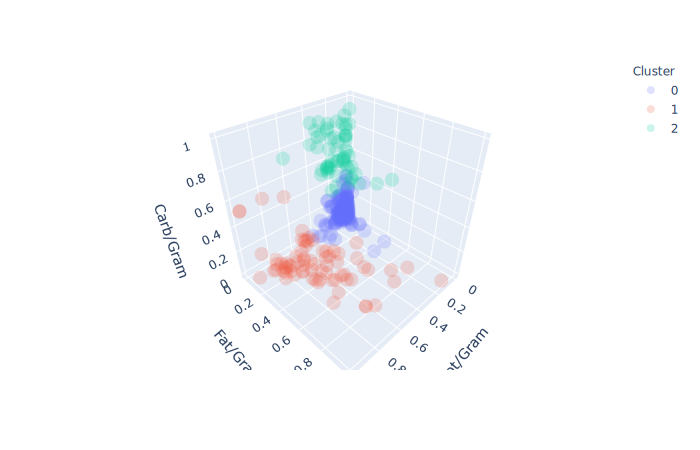

In [51]:
#Visualize the clusters
clusters = px.scatter_3d(train_data2, x = 'Prot/Gram', y = 'Fat/Gram', z = 'Carb/Gram', size_max = 10, opacity = 0.2, color = 'Cluster')
clusters.show("svg")